In [69]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

from scanner import CurriculumScanner
from classes import *
from extraction_utils import *

In [70]:
# general settings
graph_everything = True

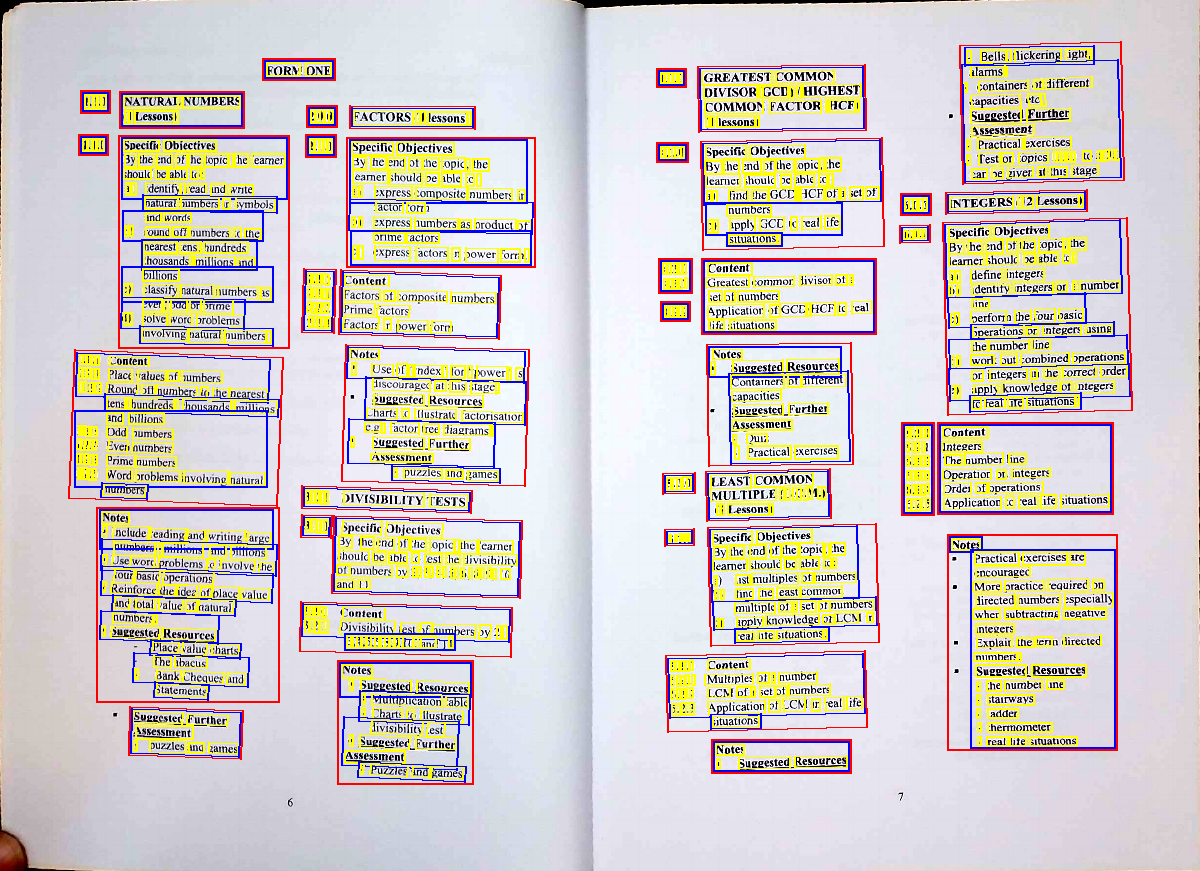

In [80]:
# load the data

doc = CurriculumScanner('inputs/KICD secondary curriculum volume II.pdf')
page_num = 8

img = PageImage(doc.get_page_image(page_num))

page_data = doc.get_page_data(page_num)

doc.draw_boxes(page_num) if graph_everything else None

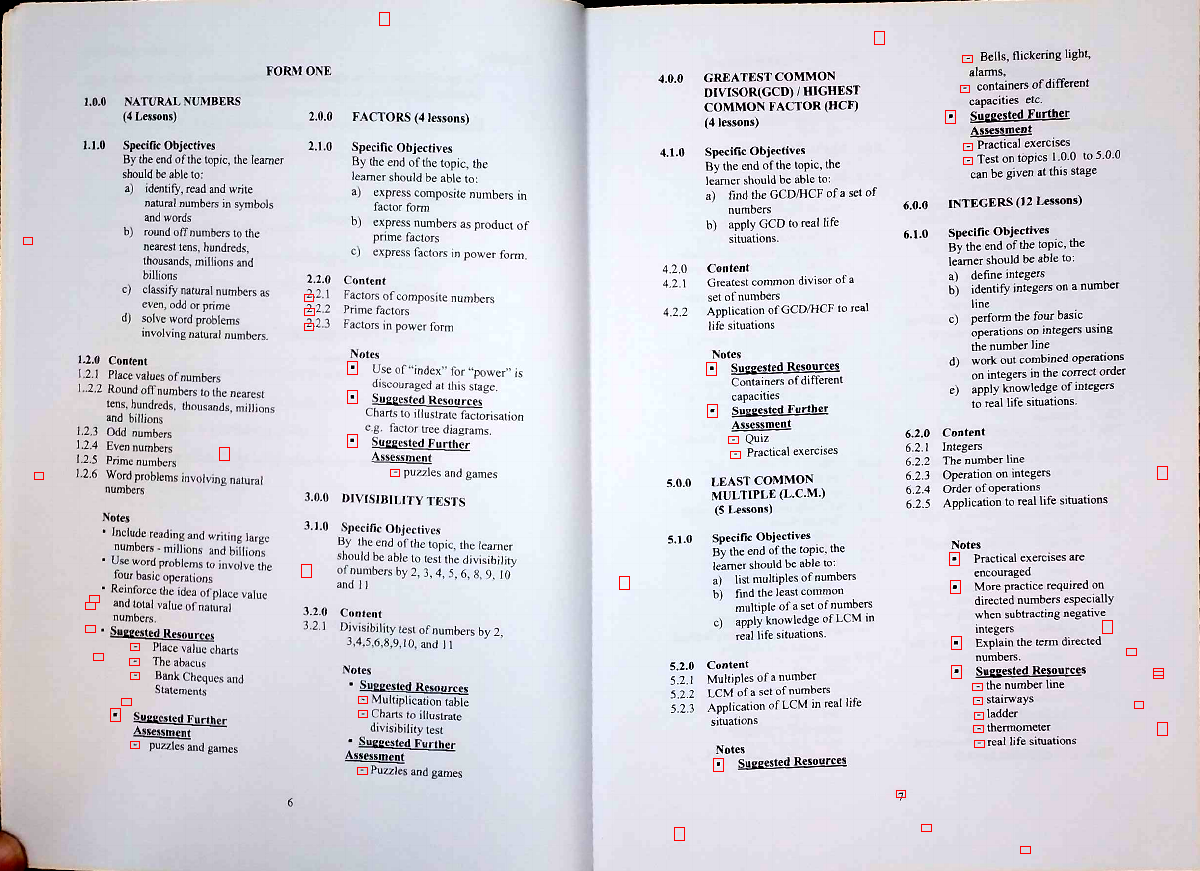

In [72]:
bullets = get_bullets_by_template(img)

if graph_everything:
    img.clear()
    for bullet in bullets:
        img.draw_box(bullet, width=1)
    
img if graph_everything else None

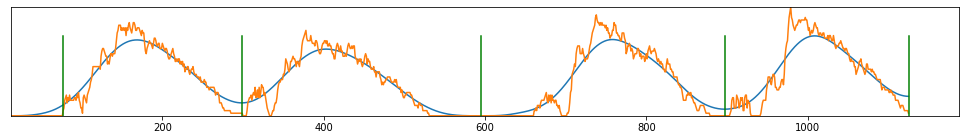

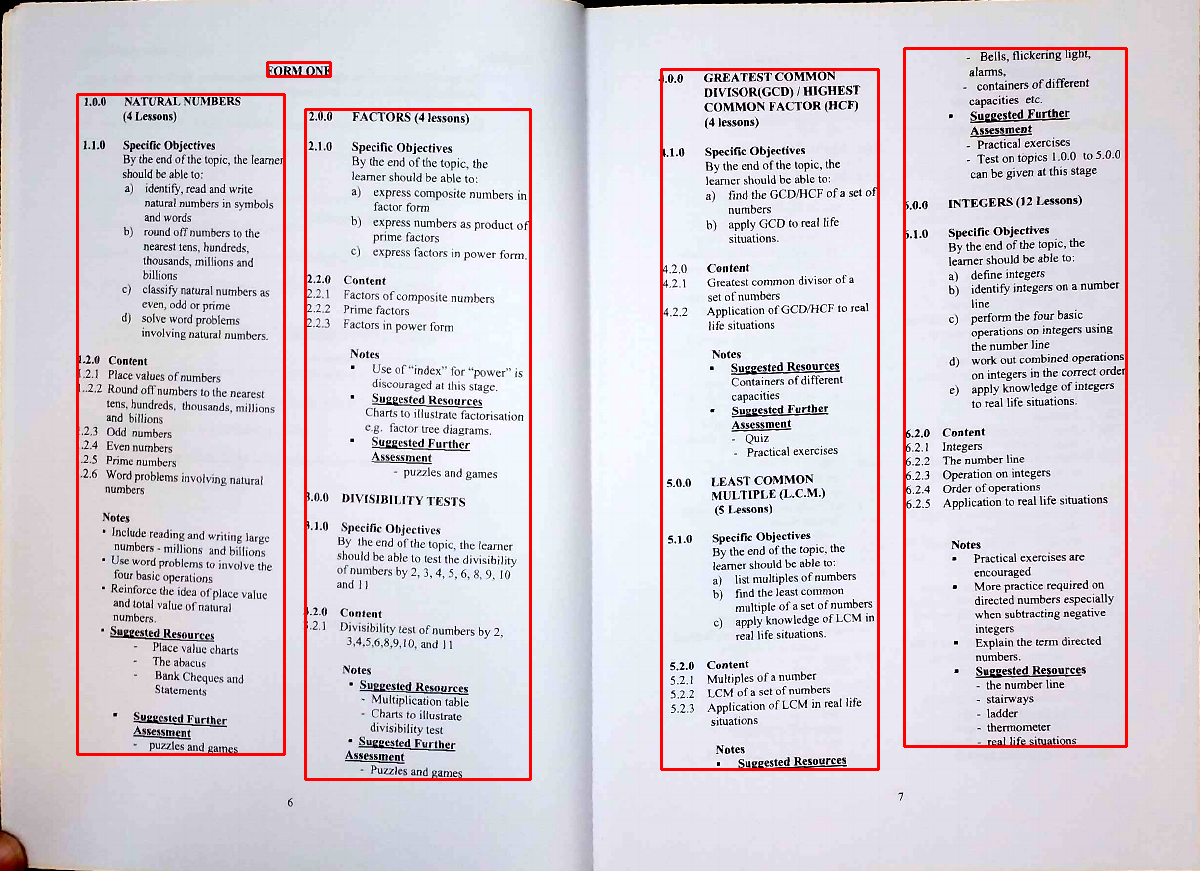

In [73]:
# extract the columns
columns = determine_column_bounding_boxes(
    page_data,
    plot_density=True,
    smoothing_granularity=8,
    prominence=1,
    width=50
)

blocks = get_original_ocr_block_boxes(page_data)
lone_blocks = [block for block in blocks if not any([block in col for col in columns])]

if graph_everything:
    img.clear()
    for column_box in columns:
        img.draw_box(column_box)
    for block in lone_blocks:
        img.draw_box(block, color=(0,255,0))
        
img if graph_everything else None

In [74]:
# extract the items by column, and join into one list
all_items = ItemList([])
for column_box in columns:
    items = extract_single_line_items_from_column(page_data, column_box=column_box, bullets=bullets)
    all_items += items

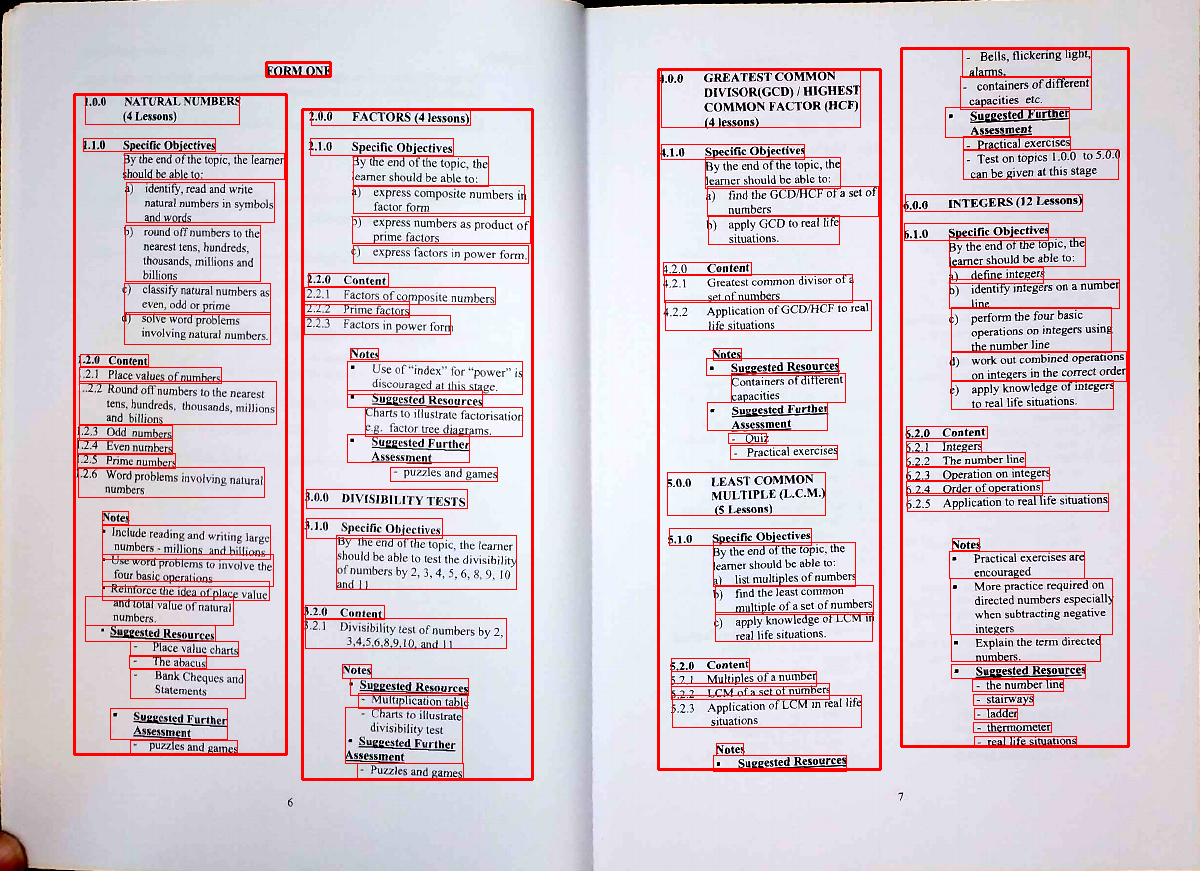

In [75]:
# go through and combine items together that belong together    
all_items = all_items.combine_lines()

if graph_everything:
    img.clear()
    for column_box in columns:
        img.draw_box(column_box.expanded(0.01))
    for item in all_items:
        img.draw_box(item.get_box(include_bullet=True), width=1)

img if graph_everything else None


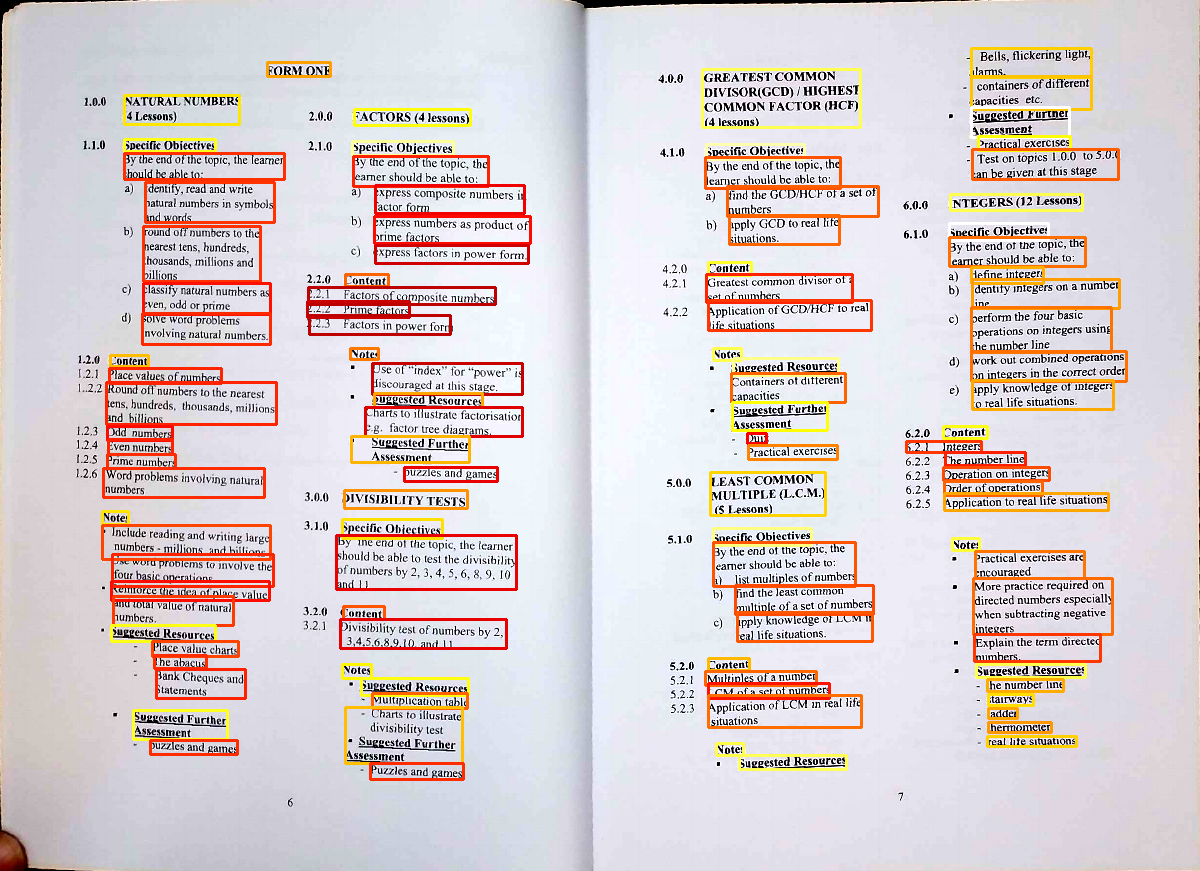

In [76]:
# annotate the lines with an estimate of their font weight
annotate_lines_with_font_weight(all_items, img)

if graph_everything:
    img.clear()
    for item in all_items:
        fontweight = int((item.average_fontweight() or 0) * 180)
        color = plt.cm.hot(fontweight)
        img.draw_box(item, color=color)
        
img if graph_everything else None

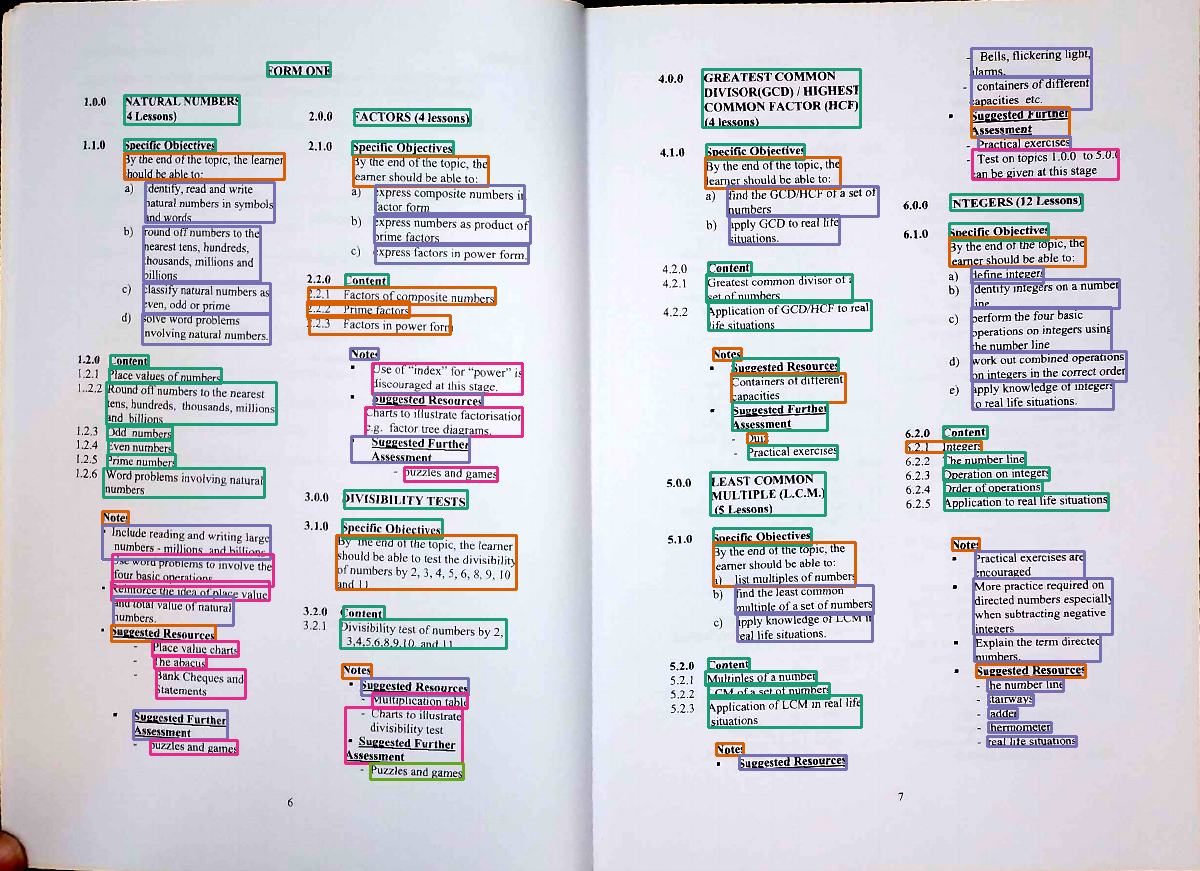

In [77]:
annotate_items_with_tab_levels_for_kicd(
    all_items,
    same_level_threshold=0.025,
    same_fontweight_threshold=0.25,
    print_debug_info=False,
)

if graph_everything:
    img.clear()
    for item in all_items:
        color = get_categorical_color(item.tabs)
        img.draw_box(item, color=color)
    
img if graph_everything else None

In [78]:
def render_to_markdown(items):
    text = ""
    for item in items:
        text += "\t" * item.tabs + "- "
        if item.bullet and item.bullet.text not in ["-", "•"]:
            text += item.bullet.text + " "
        text += item.get_text() + "\n"
    return text

print(render_to_markdown(all_items))


- FORM ONE
- 1.0.0 NATURAL, NUMBERS (4 Lessons)
- 1.1.0 Specific Objectives
	- By the end of the topic, the leamer should be able to:
		- a) identify, read and write natural numbers in symbols and words
		- b) round off numbers to the Dearest tens, hundreds thousands, millions and billions
		- c) classify natural numbers as even, odd or prime
		- d) solve word problems involving natural numbers.
- 1.2.0 Content
- 1.2.1 Place values of numbers
- 1.2.2 Round off numbers to the nearest tens, hundreds, thousands, millions and billions
- 1.2.3 Odd numbers
- 1.2.4 Even numbers
- 1.2.5 Prime numbers
- 1.2.6 Word problems involving natural numbers
	- Notes
		- Include reading and writing large numbers. millions and billions
			- Use word problems to involve the four basic operations
			- Reinforce the idea of place value
		- and total value of natural numbers.
	- Suggested Resources
			- Place value charts
			- The abacus
			- Bank Cheques and Statements
		- Sugrested Further Assessment
			- p